# Bank Customers Churn Prediction

In [1]:
# Importing the required libraries and modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data as pandas data frame
data = pd.read_csv(r"C:\Personal\DS-Py\Project\Bank Customer Churn Prediction\churn.csv")
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
# Checking the number of rows and variable
data.shape

(10000, 14)

In [4]:
# Listing out the columns of the data 
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
# Checking the data types of each variables
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# checking for the present of missing data
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Checking for duplicate data
data.duplicated().sum()

0

In [8]:
## Get unique count for each variable
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
# Dropping non relevant variable for the modeling
data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

## EXPLORATORY DATA ANALYSIS

<AxesSubplot:title={'center':'Frequency Distribution Of Gender'}>

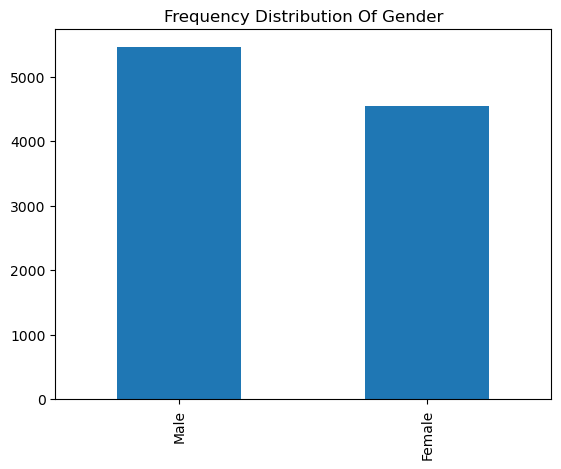

In [10]:
# Graphical representation of the gender using bar chart
data['Gender'].value_counts().plot(kind='bar',y='value_column',title='Frequency Distribution Of Gender')

<AxesSubplot:title={'center':'Frequency Distribution Of Exited'}>

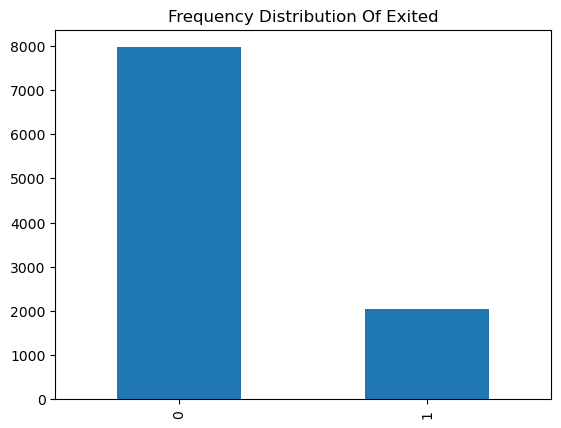

In [11]:
data['Exited'].value_counts().plot(kind='bar',y='value_column',title='Frequency Distribution Of Exited')

<AxesSubplot:title={'center':'Frequency Distribution Of Geography'}>

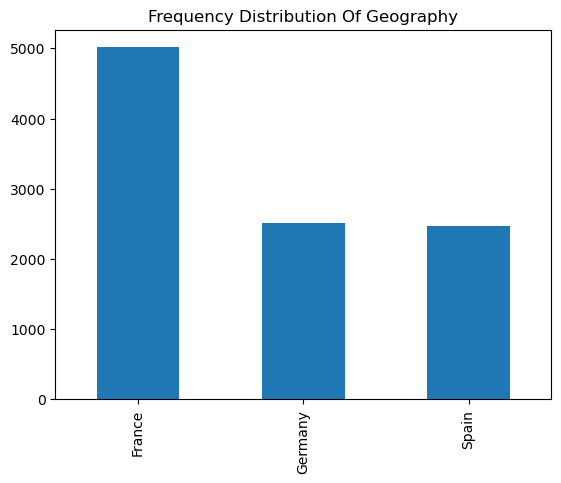

In [12]:
# Graphical representation of the geography using bar chart
data['Geography'].value_counts().plot(kind='bar',y='value_column',title='Frequency Distribution Of Geography')

In [13]:
# Checking the data first ten rows
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [14]:
# Computing the descriptive analysis of the numerical variable 
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
# computing the descriptive analysis of the categorical variable
data.describe(include=[object])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


# OUTLIER 

<AxesSubplot:xlabel='Age'>

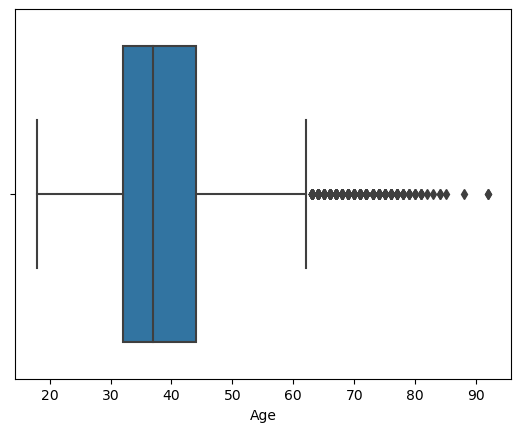

In [16]:
# Detection of outlier in age variable
sns.boxplot(data["Age"])

<AxesSubplot:xlabel='Tenure'>

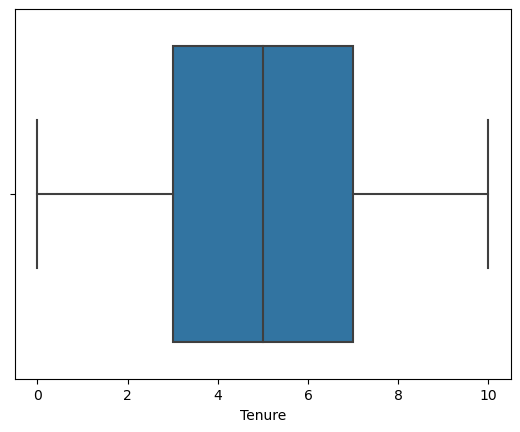

In [17]:
# Detection of outlier ib Tenure variable
sns.boxplot(data["Tenure"])

<AxesSubplot:xlabel='CreditScore'>

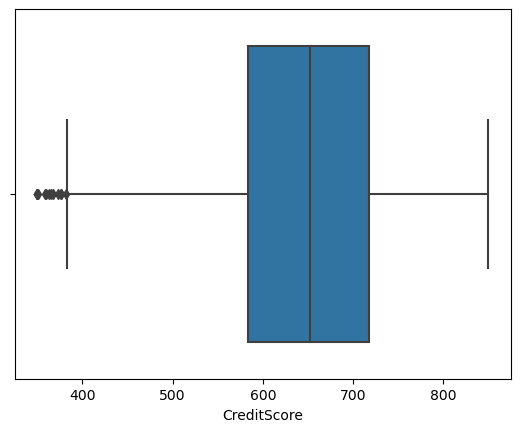

In [18]:
# Detection of outlier in credit score variable
sns.boxplot(data["CreditScore"])

# Distribution 

<AxesSubplot:xlabel='Age', ylabel='Density'>

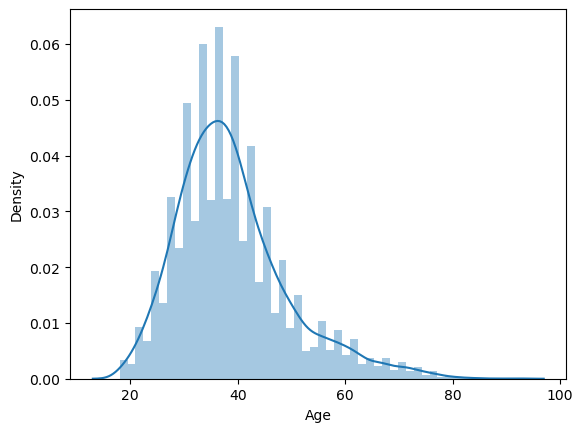

In [19]:
# Checking the distribution for the age variable
sns.distplot(data["Age"])

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

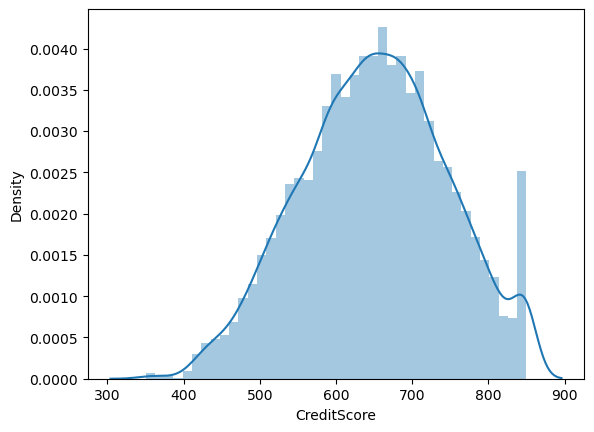

In [20]:
# Checking the distribution for the credit score variable
sns.distplot(data["CreditScore"])

In [21]:
# Tabular frequency of Gender against Exit
pd.crosstab(data["Gender"],data["Exited"])

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


Text(0.5, 1.0, 'Effect of Gender on Exited ')

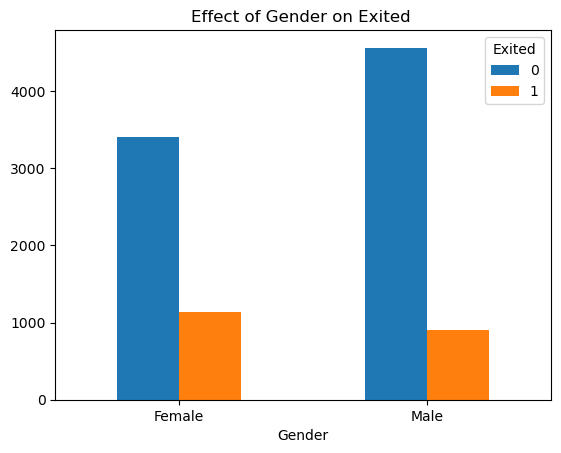

In [22]:
# Graphical representation of Gender against Exit
cross_tab = pd.crosstab(data["Gender"],data["Exited"])
cross_tab.plot.bar(rot=0)
plt.title("Effect of Gender on Exited ")

<AxesSubplot:>

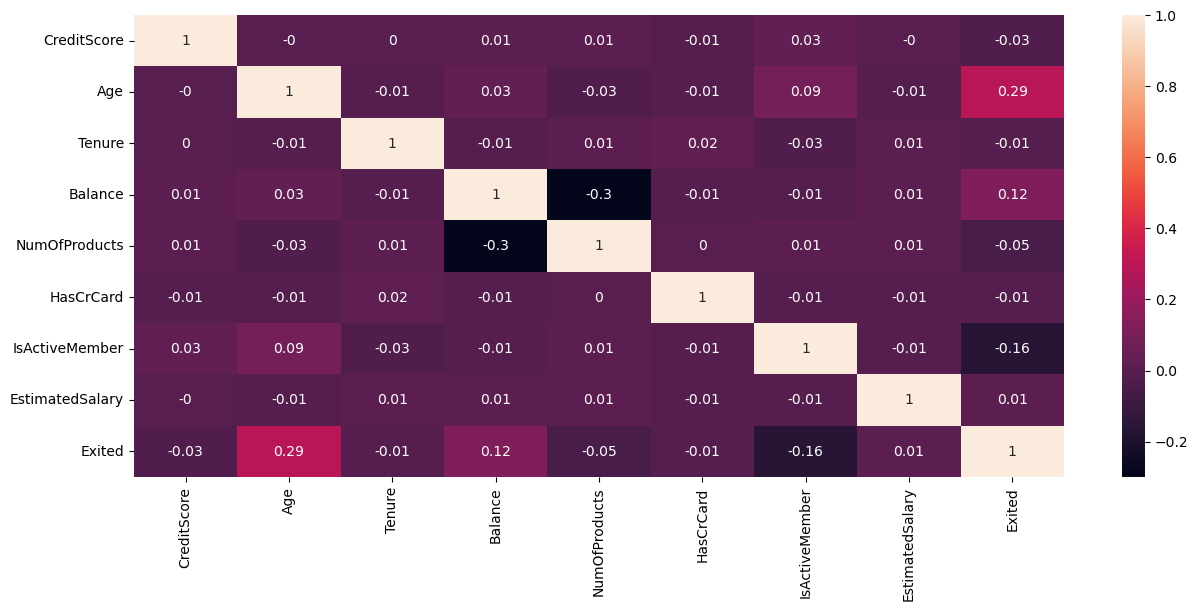

In [23]:
# Correlation values between numerical variables
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(15,6))
sns.heatmap(data=correlation_matrix,annot=True)

## ENCODING THE CATEGORICAL COLUMNS INTO NUMERICAL COLUMNS

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [25]:
# Converting categorical columns to numerical columns
encoder = LabelEncoder()
data["Gender"] = encoder.fit_transform(data["Gender"])
data["Geography"] = encoder.fit_transform(data["Geography"])

In [26]:
# Checking the data first ten rows
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


## MODEL BUILDING USING LOGISTICS REGRESSION

In [27]:
# Assigning dependent and independent variables to our data
x = data.drop(["Exited"], axis=1)
y = data["Exited"]

In [28]:
# Spliting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.75, random_state=101)

In [29]:
# standardizing data
scaler = StandardScaler()
scaler.fit(X_train)
x_trained_scaler = scaler.transform(X_train)
x_test_scaler = scaler.transform(X_test)

In [30]:
# Building Logistics regression on data
logmodel = LogisticRegression()
logmodel.fit(x_trained_scaler,y_train)

LogisticRegression()

In [31]:
# Building Random Forest on data
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_trained_scaler, y_train)

RandomForestClassifier()

In [32]:
# Building Gradiend Boosting on data
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(x_trained_scaler, y_train)

GradientBoostingClassifier()

In [33]:
# Making prediction using the logistics regression model
logistic_reg_predictions = logmodel.predict(x_test_scaler)
random_forest_predictions = random_forest_model.predict(x_test_scaler)
gradient_boosting_predictions = gradient_boosting_model.predict(x_test_scaler)

In [34]:
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)
    classification_rep = classification_report(y_test, predictions)
    
    print(f"----- {model_name} -----")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:\n", confusion_mat)
    print("Classification Report:\n", classification_rep)

evaluate_model(logistic_reg_predictions, "Logistic Regression")
evaluate_model(random_forest_predictions, "Random Forest")
evaluate_model(gradient_boosting_predictions, "Gradient Boosting")

----- Logistic Regression -----
Accuracy: 0.81
Confusion Matrix:
 [[5749  215]
 [1235  301]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      5964
           1       0.58      0.20      0.29      1536

    accuracy                           0.81      7500
   macro avg       0.70      0.58      0.59      7500
weighted avg       0.77      0.81      0.77      7500

----- Random Forest -----
Accuracy: 0.86
Confusion Matrix:
 [[5739  225]
 [ 854  682]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      5964
           1       0.75      0.44      0.56      1536

    accuracy                           0.86      7500
   macro avg       0.81      0.70      0.74      7500
weighted avg       0.85      0.86      0.84      7500

----- Gradient Boosting -----
Accuracy: 0.86
Confusion Matrix:
 [[5723  241]
 [ 845  691]]
Classification Report:
    

## Report
- Given that Random Forest and Gradient Boosting have similar accuracy and better precision/recall for the positive class (churn = 1), they might be more suitable for a churn prediction task where identifying customers at risk of churn is crucial.
- If interpretability is a top priority and the accuracy difference is acceptable, Logistic Regression might still be a reasonable choice.